<a href="https://colab.research.google.com/github/5687d/Machine-learning/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Imports
# pandas
import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/lab/102authors_binary.csv")
dataset.head()

In [7]:
print(dataset)

     getMaxDepthASTLeaf  ...  authorName
0                    17  ...         NaN
1                    17  ...         NaN
2                    17  ...         NaN
3                    17  ...         NaN
4                    17  ...         NaN
..                  ...  ...         ...
913                  17  ...         NaN
914                  17  ...         NaN
915                  17  ...         NaN
916                  17  ...         NaN
917                  17  ...         NaN

[918 rows x 764 columns]


In [10]:
class Solution():
  def getData(self, data):
    train_data = []
    label = []
    for i in range(len(data)):
      tmp = []
      line = data[i]
      for j in range(720):
        if line[j] == " ":
          line[j] = 0
        tmp.append(float(line[j]))
      train_data.append(tmp)
      label.append(line[720])
    return train_data, label

if __name__ == '__main__':
  file = open("/content/drive/MyDrive/lab/102authors_binary.csv")
  line = file.readline()
  data = []
  while line:
    line = file.readline()
    lines = list(line.split(","))
    data.append(lines)
  file.close()
  data = data[:918]
  sol = Solution()
  X, y = sol.getData(data)
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
  classifier1 =RandomForestClassifier(n_estimators = 10, max_features = "log2")
  classifier1.fit(X, y)
  score_val1 = cross_val_score(classifier1,X,y,scoring = 'f1_macro',cv=9)
  score1 = score_val1.mean()

  classifier2 =RandomForestClassifier(n_estimators = 100, max_features = "log2")
  classifier2.fit(X, y)
  score_val2 = cross_val_score(classifier2,X,y,scoring = 'f1_macro',cv=9)
  score2 = score_val2.mean()

  classifier3 =RandomForestClassifier(n_estimators = 1000, max_features = "log2")
  classifier3.fit(X, y)
  score_val3 = cross_val_score(classifier3,X,y,scoring = 'f1_macro',cv=9)
  score3 = score_val3.mean()

  print('The F1 score is ',score1)
  print('The F1 score is ',score2)
  print('The F1 score is ',score3)
    

The F1 score is  0.48718228031953514
The F1 score is  0.6183214026351281
The F1 score is  0.6510530137981119


+-----------------+--------------------+
| Number of trees |      F1 score      |
+-----------------+--------------------+
|        10       | 0.4948620188816267 |
|       100       | 0.6192447349310094 |
|       1000      | 0.6548293391430646 |
+-----------------+--------------------+


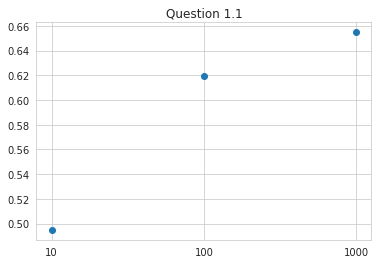

In [57]:
from prettytable import PrettyTable
x= PrettyTable(["Number of trees", "F1 score"])
x.add_row(["10",score1])
x.add_row(["100",score2])
x.add_row(["1000",score3])
print(x)
x = ['10', '100', '1000']
y = [score1, score2, score3]
plt.scatter(x, y)
plt.title("Question 1.1")
plt.show()

In [14]:
  classifier21 = RandomForestClassifier(n_estimators=100, max_features=5)
  classifier21.fit(X, y)
  features1 = cross_val_score(classifier21, X, y, scoring='f1_macro', cv=9)

  classifier22 = RandomForestClassifier(n_estimators=100, max_features=30)
  classifier22.fit(X, y)
  features2 = cross_val_score(classifier22, X, y, scoring='f1_macro', cv=9)

  classifier23 = RandomForestClassifier(n_estimators=100, max_features=100)
  classifier23.fit(X, y)
  features3 = cross_val_score(classifier23, X, y, scoring='f1_macro', cv=9)



0.6959331880900508

+---------------------------+--------------------+
| Number of random features |     F-measure      |
+---------------------------+--------------------+
|             5             | 0.5916329494760867 |
|             30            | 0.754720406681191  |
|            100            | 0.754720406681191  |
+---------------------------+--------------------+


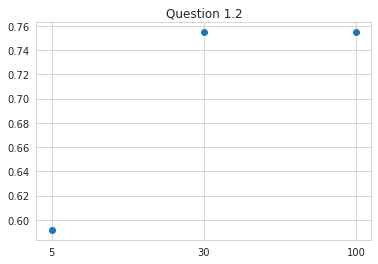

In [16]:
features1 = features1.mean()
features2 = features3.mean()
features3 = features2.mean()
from prettytable import PrettyTable
x2= PrettyTable(["Number of random features", "F-measure"])
x2.add_row(["5",features1])
x2.add_row(["30",features2])
x2.add_row(["100",features3])
print(x2)
x2 = ['5', '30', '100']
y2 = [features1, features2, features3]
plt.scatter(x2, y2)
plt.title("Question 1.2")
plt.show()

In [38]:
classes = [10, 50, 102]
fm = []
for i in classes:
  lst = []
  features = []
  cnt = 0
  for j in data:
    if j[-1] not in features:
      cnt += 1
      if cnt == i + 1:
        break
      features.append(j[-1])
    lst.append(j)
  X_, y_ = sol.getData(lst)
  classifier = RandomForestClassifier(n_estimators=100, max_features="log2")
  classifier.fit(X_, y_)
  score_val = cross_val_score(classifier, X_, y_, scoring='f1_macro', cv=9)
  fm.append(round(score_val.mean(), 3))



0.911 0.685 0.64
+-------------------+-----------+
| number of classes | F-measure |
+-------------------+-----------+
|         10        |   0.911   |
|         50        |   0.685   |
|        102        |    0.64   |
+-------------------+-----------+


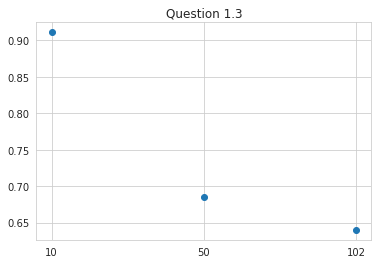

In [40]:
print(fm[0],fm[1],fm[2])
from prettytable import PrettyTable
x3= PrettyTable(["number of classes", "F-measure"])
x3.add_row(["10",fm[0]])
x3.add_row(["50",fm[1]])
x3.add_row(["102",fm[2]])
print(x3)
x3 = ['10', '50', '102']
y3 = [fm[0],fm[1],fm[2]]
plt.scatter(x3, y3)
plt.title("Question 1.3")
plt.show()

In [20]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=1000, max_features=100)
RFC.fit(X, y)
score_val_RF = cross_val_score(RFC, X, y, scoring='f1_macro', cv=9)
rfs = score_val_RF.mean()




In [21]:
from sklearn import svm
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
classifier_svm = svm.SVC(kernel='linear')
classifier_svm.fit(X, y)
score_val_SVM = cross_val_score(classifier_svm, X, y, scoring='f1_macro', cv=9)
svm = score_val_SVM.mean()

In [22]:
x21= PrettyTable(["RandomForest", "SVM"])
x21.add_row([rfs,svm])
print(x21)

+--------------------+------+
|    RandomForest    | SVM  |
+--------------------+------+
| 0.7638707334785767 | 0.25 |
+--------------------+------+


In [32]:
importance = RFC.feature_importances_
file = open("/content/drive/MyDrive/lab/102authors_binary.csv")
line = file.readline()
feature = list(line.split(","))
del feature[-1]
file.close()


In [33]:
idx_sort = np.argsort(importance)[::-1]
idx_sort = idx_sort[:20]
features = [feature[i] for i in idx_sort]
importance_ = [importance[i] for i in idx_sort]
x22= PrettyTable(["feature", "importance"])
for y in range(20):
  x22.add_row([features[y],importance_[y]])
print(x22)

+-------------------------------------------------------------------------------+-----------------------+
|                                    feature                                    |       importance      |
+-------------------------------------------------------------------------------+-----------------------+
| 'disassemblyBigramsBjoern 40=[; [numberxnumber:number]=numberxnumbercnumber]' |  0.03025861038278829  |
|                  'disassemblyBigramsNDISASM 29=[[ebx esi*2]'                  |  0.022611744168184032 |
|                   'disassemblyBigramsNDISASM 30=[[esi] dh]'                   |  0.015551117400428157 |
|                   'disassemblyBigramsNDISASM 5=[[ebx eax*2]'                  |  0.014053032084885649 |
|                     'disassemblyBigramsNDISASM 20=[or ch]'                    |  0.013995165550777832 |
|                     'disassemblyBigramsNDISASM 4=[gs xor]'                    |  0.013471184286270579 |
|                   'disassemblyBigramsNDISASM